#CDIA:::AAI - Hill Climbing Algorithm -- Travelling Salesman Problem

Ibai Laña

In this notebook we will encode TSP problem and try to solve it with HIll Climbing Algorithm.



## PROBLEM FORMULATION
The problem was formulated as a Python class, with the actions, restrictions and functions integrated and always the same name, so they can be re-coded for different problems and the search methods work the same. We start creating the class for TSP problem.

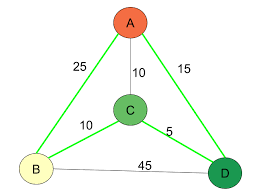

In [ ]:
a = [1,2,3,4]
a[2]=4
a

In [6]:
import numpy as np
class TSP ():
    #attributes of the class are empty
    name = ""
    initial_state = {}
    actions = []
    number_of_cities = 0
    successors = []
    # distance_matrix =

    def __init__(self): ## init method is the constructor.
        self.name ="TSP"
        self.number_of_cities = 10

        # to formulate the problem we will state that there will be a set of
        # n queens in n columns. Each queen will be placed in a column, so we
        # only need to state which row they are in, in an 8-sized array
        random_init =list(np.arange(self.number_of_cities))
        np.random.shuffle(random_init)
        self.initial_state = random_init
        self.distance_matrix = self.initialize_distance_matrix()

          # [[  0., 804., 288., 707.],
          #               [804.,   0., 945., 856.],
          #               [288., 945.,   0., 995.],
          #               [707., 856., 995.,   0.]]


    def initialize_distance_matrix(self):
      mat = np.zeros((self.number_of_cities, self.number_of_cities))
      for i in range(self.number_of_cities):
        for j in range(self.number_of_cities):
          if i!=j:
            if mat[i,j]==0:
              mat[i,j]= np.random.randint(10, 1000)
              mat[j,i] = mat[i,j]
      return mat



    def draw(self, state):
      text = ""
      for i in range(self.number_of_cities-1):
        text+="|"+str(state[i])+"|--"+str( self.distance_matrix [state[i]][state[i+1]])+"--"
      text+="|"+str(state[0])+"| ::::: "+str(self.get_evaluation(state))
      print (text)



    def get_successors(self, state):
      successors = []
      for i in range( self.number_of_cities-1):
        new_successor = state.copy()
        new_successor[i], new_successor[i+1] = state[i+1], state[i]
        successors.append (new_successor)
      new_successor = state.copy()
      new_successor[-1], new_successor[0] = state[0], state[-1]
      successors.append (new_successor)
      return successors


    def get_cost(self, action, state):
        return 1

    # h(n) =  total distance travelled
    def get_evaluation (self, state):
      total_distance=0
      for i in range (self.number_of_cities -1 ):
        total_distance += self.distance_matrix[state[i]][state[i+1]]
      total_distance += self.distance_matrix[state[-1]][state[0]]
      return total_distance


In [7]:
tsp = TSP()
print (tsp.initial_state)
print (tsp.distance_matrix)

print (tsp.get_evaluation(tsp.initial_state))
print (tsp.get_successors(tsp.initial_state))


# for s in tsp.get_successors(tsp.initial_state):
#   print (tsp.get_evaluation(s))


[2, 5, 9, 1, 8, 0, 6, 3, 7, 4]
[[  0. 795. 298. 206. 113. 193.  67. 701. 546. 550.]
 [795.   0. 351. 908. 334. 869. 200. 290. 918. 935.]
 [298. 351.   0. 142. 961. 131. 124.  38. 145. 756.]
 [206. 908. 142.   0. 686. 274. 631. 803. 721.  49.]
 [113. 334. 961. 686.   0. 348. 701. 490. 993. 818.]
 [193. 869. 131. 274. 348.   0. 519. 957. 985. 186.]
 [ 67. 200. 124. 631. 701. 519.   0. 342. 701. 921.]
 [701. 290.  38. 803. 490. 957. 342.   0. 940. 638.]
 [546. 918. 145. 721. 993. 985. 701. 940.   0. 648.]
 [550. 935. 756.  49. 818. 186. 921. 638. 648.   0.]]
5668.0
[[5, 2, 9, 1, 8, 0, 6, 3, 7, 4], [2, 9, 5, 1, 8, 0, 6, 3, 7, 4], [2, 5, 1, 9, 8, 0, 6, 3, 7, 4], [2, 5, 9, 8, 1, 0, 6, 3, 7, 4], [2, 5, 9, 1, 0, 8, 6, 3, 7, 4], [2, 5, 9, 1, 8, 6, 0, 3, 7, 4], [2, 5, 9, 1, 8, 0, 3, 6, 7, 4], [2, 5, 9, 1, 8, 0, 6, 7, 3, 4], [2, 5, 9, 1, 8, 0, 6, 3, 4, 7], [4, 5, 9, 1, 8, 0, 6, 3, 7, 2]]


# Expansion Function



In [ ]:
a = [1,2,34,0,3,4,5,0,2,2,2]


In [3]:
# instead of updating the frontier, the expand function only creates a list of child of possible nodes given a current node
# it does not receive states, but NODES, dictionaries that include other information besides state
def expand (node, problem):
    successors = problem.get_successors(node["state"])
    #1.
    best_successor = successors[0]
    2.
    for successor in successors:
      2.1
      if problem.get_evaluation(successor)<problem.get_evaluation(best_successor):
        best_successor=successor

    new_node = {}
    new_node["state"]=best_successor
    new_node["parent_node"]=node
    # we dont store the list of actions, cost or depth
    # new_node["actions"]=node["actions"] + [action]
    # new_node["cost"]=node["cost"] + problem.get_cost(action, node["state"])
    # new_node["depth"]=node["depth"]+1
    new_node["evaluation"]=problem.get_evaluation(best_successor)
    # we only return a node, the next to be explored
    return new_node


# HILL CLIMBING METHOD


In [4]:
def HillClimbing(problem):
  #1.
  initial_node = {}
  initial_node["state"]=problem.initial_state
  initial_node["parent_node"]=None
  initial_node["evaluation"]=problem.get_evaluation(problem.initial_state)

  #2.
  current_node =initial_node


  local_best_found = False

  iteration = 1
  #3.
  while not local_best_found:

    ## just prints
    print ("***************************************")
    print ("ITERATION: ", iteration)
    problem.draw(current_node["state"])
    print ("Heuristic of the current node: ", problem.get_evaluation(current_node["state"]))
    ##

    # 3.1.
    best_successor = expand(current_node, problem)
      # if current is better than the best one, we are at a local minimum
    #3.2
    if problem.get_evaluation(current_node["state"])<= problem.get_evaluation(best_successor["state"]):
      local_best_found=True
      print ("Local minimum found, best_successor heuristic is : ", problem.get_evaluation(best_successor["state"]))
      print ("BEst node with evaluation h(n)=", problem.get_evaluation(current_node["state"]))
      problem.draw(current_node["state"])
    #3.3.
    else:
      current_node = best_successor




    iteration+=1
  return current_node





In [8]:
tsp = TSP()
print (tsp.initial_state)
print (tsp.distance_matrix)

print (tsp.get_evaluation(tsp.initial_state))
print (tsp.get_successors(tsp.initial_state))

solution  = HillClimbing(tsp)



[6, 5, 3, 1, 2, 0, 8, 4, 9, 7]
[[  0. 982. 443. 903. 998. 726. 235. 830. 934. 701.]
 [982.   0. 155. 219. 408. 193. 589. 889. 523. 585.]
 [443. 155.   0.  20. 278. 927. 125. 382.  44. 325.]
 [903. 219.  20.   0. 877. 250. 859. 747. 449.  77.]
 [998. 408. 278. 877.   0. 408. 790. 815. 549. 357.]
 [726. 193. 927. 250. 408.   0. 502. 314. 497. 286.]
 [235. 589. 125. 859. 790. 502.   0. 726. 853. 576.]
 [830. 889. 382. 747. 815. 314. 726.   0. 327. 137.]
 [934. 523.  44. 449. 549. 497. 853. 327.   0. 162.]
 [701. 585. 325.  77. 357. 286. 576. 137. 162.   0.]]
4272.0
[[5, 6, 3, 1, 2, 0, 8, 4, 9, 7], [6, 3, 5, 1, 2, 0, 8, 4, 9, 7], [6, 5, 1, 3, 2, 0, 8, 4, 9, 7], [6, 5, 3, 2, 1, 0, 8, 4, 9, 7], [6, 5, 3, 1, 0, 2, 8, 4, 9, 7], [6, 5, 3, 1, 2, 8, 0, 4, 9, 7], [6, 5, 3, 1, 2, 0, 4, 8, 9, 7], [6, 5, 3, 1, 2, 0, 8, 9, 4, 7], [6, 5, 3, 1, 2, 0, 8, 4, 7, 9], [7, 5, 3, 1, 2, 0, 8, 4, 9, 6]]
***************************************
ITERATION:  1
|6|--502.0--|5|--250.0--|3|--219.0--|1|--155.0--|2|--443